In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [7]:
train = pd.read_csv('/content/gdrive/MyDrive/finalcls.csv')   
train.head()

,filename,overripe,ripe,unripe,status
0,okra-27-_jpg.rf.d0e04d2b9f92f4b19cfa009f7a9198...,0,1,0,ripe
1,WhatsApp-Image-2023-01-20-at-08-23-47_jpeg_jpg...,0,1,0,ripe
2,IMG_20220924_131236_1_jpg.rf.ccfe3518664552c4a...,0,1,0,ripe
3,a7e801dbdb129d34967dab39543a0084_jpg.rf.d5726d...,0,1,0,ripe
4,ab7fbd7d4bde6ac573bb1309715b136d_jpg.rf.ccac3c...,1,0,0,overripe


In [8]:
train.shape

(310, 5)

In [9]:
train.columns

Index(['filename', ' overripe', ' ripe', ' unripe', 'status'], dtype='object')

In [10]:
train

,filename,overripe,ripe,unripe,status
0,okra-27-_jpg.rf.d0e04d2b9f92f4b19cfa009f7a9198...,0,1,0,ripe
1,WhatsApp-Image-2023-01-20-at-08-23-47_jpeg_jpg...,0,1,0,ripe
2,IMG_20220924_131236_1_jpg.rf.ccfe3518664552c4a...,0,1,0,ripe
3,a7e801dbdb129d34967dab39543a0084_jpg.rf.d5726d...,0,1,0,ripe
4,ab7fbd7d4bde6ac573bb1309715b136d_jpg.rf.ccac3c...,1,0,0,overripe
...,...,...,...,...,...
305,stock-photo-fresh-okra-on-green-close-up-60011...,0,1,0,ripe
306,IMG_20220924_131215_1_jpg.rf.c309ab607a1dcb5e6...,0,1,1,ripe unripe
307,IMG_20220920_075345_jpg.rf.c5fe316f15291c2ac2a...,0,1,0,ripe
308,stock-photo-okra-on-tree-111836852_jpg.rf.c5cf...,0,1,0,ripe


In [11]:
train

,filename,overripe,ripe,unripe,status
0,okra-27-_jpg.rf.d0e04d2b9f92f4b19cfa009f7a9198...,0,1,0,ripe
1,WhatsApp-Image-2023-01-20-at-08-23-47_jpeg_jpg...,0,1,0,ripe
2,IMG_20220924_131236_1_jpg.rf.ccfe3518664552c4a...,0,1,0,ripe
3,a7e801dbdb129d34967dab39543a0084_jpg.rf.d5726d...,0,1,0,ripe
4,ab7fbd7d4bde6ac573bb1309715b136d_jpg.rf.ccac3c...,1,0,0,overripe
...,...,...,...,...,...
305,stock-photo-fresh-okra-on-green-close-up-60011...,0,1,0,ripe
306,IMG_20220924_131215_1_jpg.rf.c309ab607a1dcb5e6...,0,1,1,ripe unripe
307,IMG_20220920_075345_jpg.rf.c5fe316f15291c2ac2a...,0,1,0,ripe
308,stock-photo-okra-on-tree-111836852_jpg.rf.c5cf...,0,1,0,ripe


In [12]:
import keras.utils as image
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/gdrive/MyDrive/new_dat/train/'+train['filename'][i],target_size=(400,400,25))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 310/310 [00:02<00:00, 127.64it/s]


In [13]:
train.drop('filename',axis=1,inplace=True)

In [14]:
X.shape

(310, 400, 400, 3)

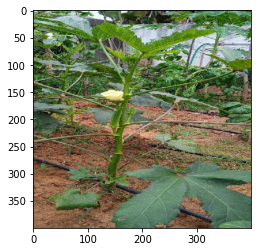

In [15]:
plt.imshow(X[2])

In [16]:
train

,overripe,ripe,unripe,status
0,0,1,0,ripe
1,0,1,0,ripe
2,0,1,0,ripe
3,0,1,0,ripe
4,1,0,0,overripe
...,...,...,...,...
305,0,1,0,ripe
306,0,1,1,ripe unripe
307,0,1,0,ripe
308,0,1,0,ripe


In [17]:
y = np.array(train.drop(['status'],axis=1))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [37]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 396, 396, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 198, 198, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 198, 198, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 194, 194, 32)      12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 97, 97, 32)       

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
X_train.shape

(217, 400, 400, 3)

In [41]:
y_train.shape

(217, 3)

In [42]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=25)

Epoch 1/50
9/9 [==============================] - 5s 227ms/step - loss: 0.7412 - accuracy: 0.6175 - val_loss: 0.6589 - val_accuracy: 0.8817
Epoch 2/50
9/9 [==============================] - 2s 175ms/step - loss: 0.6074 - accuracy: 0.7005 - val_loss: 0.6295 - val_accuracy: 0.8817
Epoch 3/50
9/9 [==============================] - 1s 169ms/step - loss: 0.5743 - accuracy: 0.7512 - val_loss: 0.6006 - val_accuracy: 0.8817
Epoch 4/50
9/9 [==============================] - 1s 151ms/step - loss: 0.5489 - accuracy: 0.7788 - val_loss: 0.5922 - val_accuracy: 0.8817
Epoch 5/50
9/9 [==============================] - 1s 148ms/step - loss: 0.5417 - accuracy: 0.8479 - val_loss: 0.5395 - val_accuracy: 0.8817
Epoch 6/50
9/9 [==============================] - 1s 146ms/step - loss: 0.5347 - accuracy: 0.8433 - val_loss: 0.5692 - val_accuracy: 0.8817
Epoch 7/50
9/9 [==============================] - 1s 147ms/step - loss: 0.5075 - accuracy: 0.8157 - val_loss: 0.5221 - val_accuracy: 0.8817
Epoch 8/50
9/9 [====

In [59]:
img = image.load_img('/content/gdrive/MyDrive/new_dat/train/14_edited_png_jpg.rf.222891ed2467ff063a376f31893787ad.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

1/1 [==============================] - 0s 20ms/step
 ripe (0.876)
 unripe (0.354)
 overripe (0.107)


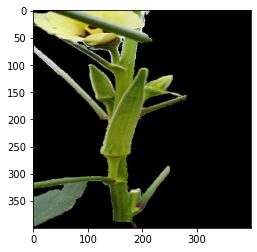

In [60]:
classes = np.array(train.columns[:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [64]:
img = image.load_img('/content/gdrive/MyDrive/new_dat/train/20-gardens-vegetable-seeds-okro-okra-seeds-ladies-finger-seeds-original-imafg9ybc2tauj9h_jpg.rf.d961dec09aff68776a33dbf336fa301a.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

1/1 [==============================] - 0s 20ms/step
 ripe (0.875)
 unripe (0.354)
 overripe (0.108)


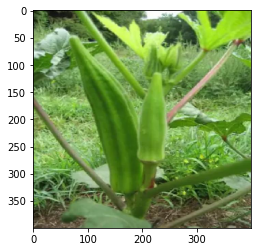

In [65]:
classes = np.array(train.columns[:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [67]:
img = image.load_img('/content/gdrive/MyDrive/new_dat/train/images-22-_jpeg_jpg.rf.4dc25b0bc2c53e7cdcae005af1b6eb6e.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

1/1 [==============================] - 0s 21ms/step
 ripe (0.875)
 unripe (0.354)
 overripe (0.107)


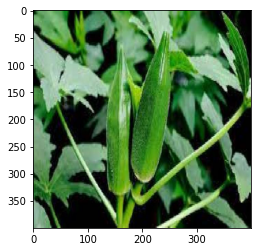

In [68]:
classes = np.array(train.columns[:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-5:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)